Gabriel Riegner: 12 OCT 2024

---
**Problem 1**: Error probability, theory versus practice

Design a simulation study that replicates Figure 1.1 of the High-Dimensional Statistics textbook. There are two population level curves and one empirical.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams["axes.grid"] = True

# setting
n, d = 800, 400
alpha = d / n
n_gammas, n_trials = 11, 50
gammas = np.linspace(1, 2, n_gammas)

# random seed
rng = np.random.default_rng(seed=0)


# simulation study
def psi(x, mu1_, mu2_):  # eq: 1.5
    return ((x - (mu1_ + mu2_) / 2)) @ (mu1_ - mu2_)


gammas_ = np.zeros(n_gammas)
errors_ = np.zeros((len(gammas), n_trials))

for gamma_idx in range(n_gammas):
    for trial_idx in range(n_trials):

        mu1 = np.zeros(shape=d)
        mu2 = rng.normal(size=d)
        mu2 = gammas[gamma_idx] * (mu2 / np.linalg.norm(mu2))

        x1 = rng.multivariate_normal(mean=mu1, cov=np.eye(d), size=n)
        x2 = rng.multivariate_normal(mean=mu2, cov=np.eye(d), size=n)

        mu1_ = x1.mean(axis=0)
        mu2_ = x2.mean(axis=0)

        p1_ = (psi(x1, mu1_, mu2_) - 0.5 <= 0).mean()
        p2_ = (psi(x2, mu1_, mu2_) + 0.5 > 0).mean()

        errors_[gamma_idx, trial_idx] = (p1_ + p2_) / 2

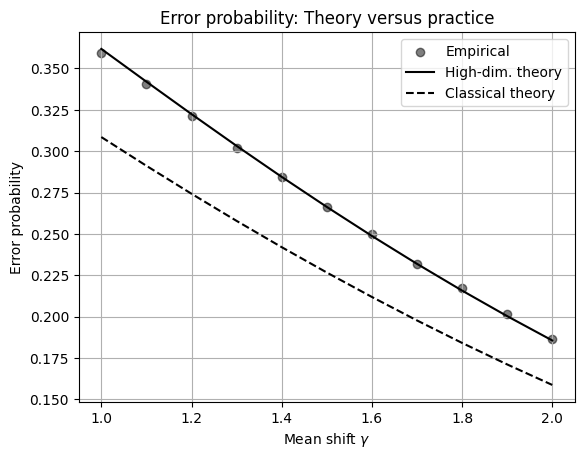

In [2]:
high_dim = norm.cdf(-(gammas**2) / (2 * np.sqrt(gammas**2 + 2 * alpha)))  # eq: 1.6
classical = norm.cdf(-gammas / 2)  # eq: 1.2

fig, ax = plt.subplots()
ax.set_title("Error probability: Theory versus practice")
ax.set_xlabel(r"Mean shift $\gamma$")
ax.set_ylabel("Error probability")
ax.scatter(gammas, errors_.mean(axis=1), color="k", alpha=0.5, label="Empirical")
ax.plot(gammas, high_dim, ls="-", color="k", label="High-dim. theory")
ax.plot(gammas, classical, ls="--", color="k", label="Classical theory")
ax.legend()